<a href="https://colab.research.google.com/github/Prakface/Practice/blob/master/Appending__previous_with_new_weights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import math
from torch.autograd import Variable


url='https://raw.githubusercontent.com/Prakface/Practice/master/One_mon_present_full.csv'

url2='https://raw.githubusercontent.com/Prakface/Practice/master/Final_one_month_prev_features.csv'

data = pd.read_csv(url) 

data2= pd.read_csv(url2)

print("Data Shape:", data.shape) 

#data=pd.read_csv(url)

df=pd.DataFrame(data)
print(data.head()) 


data_modified= data.dropna()

data_modified.to_csv("modifiedData.csv", index=False)


df2=pd.read_csv("modifiedData.csv")

print(df2[0:6])

print(df2['result'])

df_main=df2[df2.columns[~df2.columns.isin(['text', 'user_name'])]]

print(df_main.columns)

print(len(df_main.columns))

  
# X_1, y_1 means rpesent tweets' data
X_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_1=X_1.iloc[:,1:len(X_1.columns)].values   #removing the unnamed attribute
x_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x_1=x_1.iloc[:,1:len(x_1.columns)].values 
y_1=df_main.loc[:, ['result']].values


print(type(X_1), type(y_1), type(x_1), type(y_1))

print(X_1.shape)
print(y_1.shape)




Data Shape: (1908, 40)
  Unnamed: 0 cat1  cat10  ...      tweet_id  url      user_name
0          0    0      0  ...  8.323790e+17  0.0  THEJEROMEOWEN
1          1    0      0  ...  8.323786e+17  0.0       Acejinjo
2          2    0      0  ...  8.323780e+17  0.0     RabRakha21
3          3    0      0  ...  8.323777e+17  0.0       RS_Aloha
4          4    0      0  ...  8.323767e+17  0.0  preciselyizzy

[5 rows x 40 columns]
   Unnamed: 0  cat1  cat10  ...      tweet_id  url        user_name
0           0     0      0  ...  8.323790e+17  0.0    THEJEROMEOWEN
1           1     0      0  ...  8.323786e+17  0.0         Acejinjo
2           2     0      0  ...  8.323780e+17  0.0       RabRakha21
3           3     0      0  ...  8.323777e+17  0.0         RS_Aloha
4           4     0      0  ...  8.323767e+17  0.0    preciselyizzy
5           5     0      0  ...  8.323759e+17  0.0  thefireistarted

[6 rows x 40 columns]
0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
5       1.0

In [5]:
data2= pd.read_csv(url2)

print("Data Shape:", data2.shape) 

#data=pd.read_csv(url)

df_prev=pd.DataFrame(data2)
print(data2.head()) 


data2_modified= data2.dropna()

data2_modified.to_csv("modifiedData2.csv", index=False)


df_2=pd.read_csv("modifiedData2.csv")

print(df_2[0:6])

print(df_2['result'])

df_main2=df_2[df_2.columns[~df_2.columns.isin(['text', 'user_name'])]]

print(df_main2.columns)

print(len(df_main2.columns))

  

X_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_2=X_2.iloc[:,1:len(X_2.columns)].values   #removing the unnamed attribute
x_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]
x_2=x_2.iloc[:,1:len(x_2.columns)].values 
y_2=df_main2.loc[:, ['result']].values


print(type(X_2), type(y_2), type(x_2), type(y_2))

print(X_2.shape)
print(y_2.shape)

Data Shape: (3004, 38)
   Unnamed: 0  cat1  cat10  ...             tweet_id  url      user_name
0           0     0      0  ...  1155575657402961920    1  THEJEROMEOWEN
1           1     0      0  ...  1155459426243043328    0  THEJEROMEOWEN
2           2     0      0  ...  1126969730307448832    0     rabrakha14
3           3     0      0  ...  1155277550794338304    0       RS_Aloha
4           4     0      0  ...  1155188179395207168    0       RS_Aloha

[5 rows x 38 columns]
   Unnamed: 0  cat1  cat10  ...             tweet_id  url      user_name
0           0     0      0  ...  1155575657402961920    1  THEJEROMEOWEN
1           1     0      0  ...  1155459426243043328    0  THEJEROMEOWEN
2           2     0      0  ...  1126969730307448832    0     rabrakha14
3           3     0      0  ...  1155277550794338304    0       RS_Aloha
4           4     0      0  ...  1155188179395207168    0       RS_Aloha
5           5     0      0  ...  1154962871765393408    0  preciselyizzy

[6 r

In [6]:
#Appending present and previosu data

tem=np.append(X_1, X_2, axis=0)
tem_y=np.append(y_1,y_2,axis=0)
print(X_1.shape, X_2.shape, tem.shape)
print(y_1.shape, y_2.shape, tem_y.shape)

X=tem
T=tem_y

print(X.shape, T.shape)

print(type(X_1))
#convert to tensor
X = torch.from_numpy(X)
T = torch.from_numpy(T)

X_1 = torch.from_numpy(X_1)
T_1 = torch.from_numpy(y_1)

X_2 = torch.from_numpy(X_2)
T_2 = torch.from_numpy(y_2)

print(type(X), type(T))

(1906, 34) (3004, 34) (4910, 34)
(1906, 1) (3004, 1) (4910, 1)
(4910, 34) (4910, 1)
<class 'numpy.ndarray'>
<class 'torch.Tensor'> <class 'torch.Tensor'>


In [7]:


#X_2 = torch.from_numpy(X_2)
#T_2 = torch.from_numpy(y_2)

import torch as pytorch

pytorch.set_default_tensor_type('torch.DoubleTensor')
#random weights
X_2=X_2.type(torch.DoubleTensor)
T_2=T_2.type(torch.DoubleTensor)

print(torch.Tensor(X_2).dtype)
print(torch.Tensor(X_1).dtype)
print("\n dtype of T_2 \n", torch.Tensor(T_2).dtype)

W = Variable(torch.randn(1, 34, dtype=torch.double), requires_grad=True)
b = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)
print(W.size())

#Weights for Previoes tweets
#W1 = Variable(torch.randn(1, 34, dtype=torch.double), requires_grad=True)
W_p = Variable(torch.randn(1, 34, dtype=torch.double), requires_grad=True)
#W_p=W_p.type(torch.LongTensor)
b_p = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)
print(W_p.size(), torch.Tensor(W_p).dtype)
print(W.size(), torch.Tensor(W_p).dtype)


#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# Loss (cross entropy) error function
def error(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)
  
#out = sigmoid(torch.mm(X, W.view(34,1))+b)

out_present= sigmoid(torch.mm(X_1, W.view(34,1))+b)

#W1=W1.type(torch.LongTensor)
#out_present2= sigmoid(torch.mm(X_2, W1.view(34,1))+b)

out_prev= sigmoid(torch.mm(X_2, W_p.view(34,1))+b_p)
print(W.size())



#we also could use: torch.nn.Sigmoid()
#out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)

#print(out.shape, T.shape)

print(out_present.shape, T_1.shape)

print(out_prev.shape, T_2.shape)


#err = error(out,T)
err_1 = error(out_present,T_1)
err_2 = error(out_prev,T_2)




#loss = torch.mean(err)
loss = torch.sum(torch.mean(err_1)+torch.mean(err_2))

print(err_1, err_2)
print(torch.sum(err_1), torch.sum(err_2))

#we need to scale down

torch.float64
torch.float64

 dtype of T_2 
 torch.float64
torch.Size([1, 34])
torch.Size([1, 34]) torch.float64
torch.Size([1, 34]) torch.float64
torch.Size([1, 34])
torch.Size([1906, 1]) torch.Size([1906, 1])
torch.Size([3004, 1]) torch.Size([3004, 1])
tensor([[1.3066],
        [3.7045],
        [0.0309],
        ...,
        [2.8739],
        [0.0708],
        [2.5995]], grad_fn=<SubBackward0>) tensor([[1.3550e-05],
        [       inf],
        [2.7310e-04],
        ...,
        [2.4086e-02],
        [       inf],
        [       inf]], grad_fn=<SubBackward0>)
tensor(nan, grad_fn=<SumBackward0>) tensor(inf, grad_fn=<SumBackward0>)


unexpected type error , while the same type is working for out , it is not for out2 This is because X_2 (the first argument ) is in Long format, so the second argument is also expected to be long.. To solve the issue, we need to convert X_2 to double format..

In [9]:
## Scaling data set and applying the logistic regression

from sklearn.preprocessing import StandardScaler
'''
X=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X=X.iloc[:,1:len(X.columns)].values   #removing the unnamed attribute
x=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x=x.iloc[:,1:len(x.columns)].values 
y=df_main.loc[:, ['result']].values
'''

# X_1, y_1 means rpesent tweets' data
X_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_1=X_1.iloc[:,1:len(X_1.columns)].values   #removing the unnamed attribute
x_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x_1=x_1.iloc[:,1:len(x_1.columns)].values 
y_1=df_main.loc[:, ['result']].values



data1=X_1

scaler = StandardScaler()
print(scaler.fit(data1))
print(scaler.transform(data1))

new_data1=scaler.transform(data1)

X_1=torch.from_numpy(new_data1)
T_1= torch.from_numpy(y_1)

#random weights
W = Variable(torch.randn(1, 34, dtype=torch.double), requires_grad=True)
b = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)


import torch as pytorch
X_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_2=X_2.iloc[:,1:len(X_2.columns)].values   #removing the unnamed attribute
x_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]
x_2=x_2.iloc[:,1:len(x_2.columns)].values 
y_2=df_main2.loc[:, ['result']].values


data2=X_2

scaler = StandardScaler()
print(scaler.fit(data2))
print(scaler.transform(data2))
new_data2=scaler.transform(data2)

X_2=torch.from_numpy(new_data2)
T_2= torch.from_numpy(y_2)

#do rescaling again

d3=data2
scaler2=StandardScaler()
print(scaler.fit(d3))
print(scaler.transform(d3))

new_data3=scaler.transform(d3)

X_2=torch.from_numpy(new_data3)
T_2= torch.from_numpy(y_2)


#normalizing the data



pytorch.set_default_tensor_type('torch.DoubleTensor')
#random weights
X_2=X_2.type(torch.DoubleTensor)
T_2=T_2.type(torch.DoubleTensor)

print(torch.Tensor(X_2).dtype)
print(torch.Tensor(X_1).dtype)
print("\n dtype of T_2 \n", torch.Tensor(T_2).dtype)


W_p = Variable(torch.randn(1, 34, dtype=torch.double), requires_grad=True)
#W_p=W_p.type(torch.LongTensor)
b_p = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)
print(W_p.size(), torch.Tensor(W_p).dtype)
print(W.size(), torch.Tensor(W_p).dtype)


#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# Loss (cross entropy) error function
def error(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)
  
out = sigmoid(torch.mm(X_1, W.view(34,1))+b)
#we also could use: torch.nn.Sigmoid()
#out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)
#err = error(out,T)
#loss = torch.mean(err)  

#print(err)
#print(torch.mean(err))
out_prev= sigmoid(torch.mm(X_2, W_p.view(34,1))+b_p)
print(W.size())



#we also could use: torch.nn.Sigmoid()
#out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)

#print(out.shape, T.shape)

print(out_present.shape, T_1.shape)

print(out_prev.shape, T_2.shape)


#err = error(out,T)
err_1 = error(out,T_1)
err_2 = error(out_prev,T_2)




#loss = torch.mean(err)
loss = torch.sum(torch.mean(err_1)+torch.mean(err_2))

print(err_1,"\n \n" , err_2)

print("\n mean of errors \n")
print(torch.mean(err_1), "\n \n", torch.mean(err_2))

print("\n sum of errors \n")
print(torch.sum(err_1), "\n \n", torch.sum(err_2))







StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.13476792 -0.19493167 -0.19200937 ...  0.         -0.36993901
  -0.33372183]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.         -1.60479674
  -0.33372183]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.          0.86491871
  -0.33372183]
 ...
 [-0.13476792 -0.19493167 -0.19200937 ...  0.          0.86491871
   2.99650757]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.         -1.60479674
  -0.33372183]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.          0.86491871
  -0.33372183]]
StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.11763217 -0.21155006 -0.18703747 ...  0.         -0.33180166
   1.66123437]
 [-0.11763217 -0.21155006 -0.18703747 ...  0.         -0.33180166
  -0.60196202]
 [-0.11763217 -0.21155006 -0.18703747 ...  0.          1.10028483
  -0.60196202]
 ...
 [-0.11763217 -0.21155006 -0.18703747 ...  0.         -1.76388815
   1.66123437]
 [-0.11763217  7.83270806 -0.18703747 ...  0.          1.10028483

We are getting NaN for previous tweets sum !!

In [0]:
import random 
from random import randint


test_X=[]
test_y=[]

temp=random.sample(range(1,len(X)), 10)
print(temp)

for i in temp:
  test_X.append(X[i])
  test_y.append(y[i])
  
  


  
  
print(type(test_X), type(test_y))

In [12]:
x=[1,3,4]
y=[1,7,8,5,6,3,4]
z=[3,5,6,8,4,9.1]

for i, j in zip(y,z):
  print(i,j)
  

print("\n\nOther-----\n")
  
for i, j, k in zip(x,y,z):
  print(i, j,k)

1 3
7 5
8 6
5 8
6 4
3 9.1


Other-----

1 1 3
3 7 5
4 8 6


In [13]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1.numpy(), T_1.numpy(), test_size=0.33, random_state=42)

X_1=torch.from_numpy(X_train1)
T_1=torch.from_numpy(y_train1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2.numpy(), T_2.numpy(), test_size=0.33, random_state=53)

X_2=torch.from_numpy(X_train2)
T_2=torch.from_numpy(y_train2)
#test_X=torch.from_numpy(X_test)
#test_y=torch.from_numpy(y_test)
test_X1=[]
test_y1=[]
test_X2=[]
test_y2=[]
for i in X_test1:
  test_X1.append(i)
  
for i in y_test1:
  test_y1.append(i)
  
  
  
for i in X_test2:
  test_X2.append(i)
  
for i in y_test2:
  test_y2.append(i)
  
  
print(type(test_X1), type(test_y1), type(test_X2), type(test_y2))

<class 'list'> <class 'list'> <class 'list'> <class 'list'>


In [14]:
import math 

epochs=1500
alpha=0.001
n_iter=1

torch.set_default_tensor_type('torch.DoubleTensor')
for i in range(epochs):
    #alternative0 (explicit definition)
    out = sigmoid(torch.mm(X_1, W.view(34,1))+b)
    out_prev=sigmoid(torch.mm(X_2,W_p.view(34,1))+b_p)
    #we also could use: torch.nn.Sigmoid()
    #out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)
    err_1 = error(out,T_1)
    err_2= error(out_prev, T_2)
    loss = torch.sum(torch.mean(err_1)+toch.mean(err_2)

    #alternative1 (pytorch defined loss function)
    #out = torch.mm(X, W.view(2,1))+b
    #loss = criterion(out, T.double())     

    #alternative2 (custom error function)
    #cross_entropy = CE.apply
    #out = sigmoid(torch.mm(X, W.view(2,1))+b)
    #err = cross_entropy(out,T)
    #loss = torch.mean(err)    
    
    #compute gradients
    loss.backward()

    last_w = W.data.numpy()[0].copy()
    last_b = b.data.numpy()[0].copy()
    last_w2 = W_p.data.numpy()[0].copy()
    last_b2 = b_p.data.numpy()[0].copy()                 
       
    with torch.no_grad():
        W -= alpha * W.grad
        b -= alpha * b.grad
        W_p -= alpha * W_p.grad
        b_p -= alpha * b_p.grad             
        

        # Manually zero the gradients after updating weights
        W.grad.zero_()
        b.grad.zero_()
                     
        W_p.grad.zero_()
        b_p.grad.zero_()             
        #print(loss)
    
    n_iter+=1
    if n_iter%100==0:
      correct = 0
      total = 0
            
      # Iterate through train dataset
      for X_v1, y_v1, X_v2,y_v2 in zip(X_train1,y_train1,X_train2,y_train2):
        #print("Hi")
        # Load images to a Torch Variable
        #images = Variable(images.view(-1, 28*28))
        # Forward pass only to get logits/output
        #outputs = sigmoid(X_val)
        X_v1=torch.Tensor(X_v1)
        X_temp1=(X_v1.view(1,34))
        W_temp1=(W.view(34,1))
                     
        X_v2=torch.Tensor(X_v2)
        X_temp2=(X_v2.view(1,34))
        W_temp2=(W_p.view(34,1))
        #print(X_val)
        outputs=sigmoid(torch.mm(X_temp,W_temp)+b)
        
        outputs2=sigmoid(torch.mm(X_temp2,W_temp2)+b_p)
        #print(outputs)
        # Get predictions from the maximum value
        #_, predicted = torch.max(outputs.data, 1)
        # prediction part              
        pred_val1=(outputs.detach().numpy())
                     
        pred_val2=(outputs2.detach().numpy())
                     
                     
        pred_val= (2*pred_val1*pred_val2)/ (pred_val1 + pred_val2)   #using harmonic mean
                     
        #pred_val= (pred_val1 + pred_val2 ) /2      #using Arithmetic mean
                     
                     
                     
                     
        #print(type(pred_val), pred_val) 
        # for accessing scalar value from tensor, by converting it to numpy array
        for i in pred_val:
          for j in i:
            #print(type(j))
            temp=j
            
        predicted=round(temp)
        # Total number of labels
        #total += y_val.size(0)
        total+=1
        # Total correct predictions
        correct += (predicted == y_v).sum()
        
      accuracy = 100 * correct / total
      print("\n In epoch ", n_iter, " Training accuracy= ", accuracy)
      
      
      # Iterate through test dataset
      for X_v1, y_v1, X_v2,y_v2 in zip(X_test1,y_test1,X_test2,y_test2):
        #print("Hi")
        # Load images to a Torch Variable
        #images = Variable(images.view(-1, 28*28))
        # Forward pass only to get logits/output
        #outputs = sigmoid(X_val)
        X_v1=torch.Tensor(X_v1)
        X_temp1=(X_v1.view(1,34))
        W_temp1=(W.view(34,1))
                     
        X_v2=torch.Tensor(X_v2)
        X_temp2=(X_v2.view(1,34))
        W_temp2=(W_p.view(34,1))
        #print(X_val)
        outputs=sigmoid(torch.mm(X_temp,W_temp)+b)
        
        outputs2=sigmoid(torch.mm(X_temp2,W_temp2)+b_p)
        #print(outputs)
        # Get predictions from the maximum value
        #_, predicted = torch.max(outputs.data, 1)
        # prediction part              
        pred_val1=(outputs.detach().numpy())
                     
        pred_val2=(outputs2.detach().numpy())
                     
                     
        pred_val= (2*pred_val1*pred_val2)/ (pred_val1 + pred_val2)   #using harmonic mean
                     
        #pred_val= (pred_val1 + pred_val2 ) /2      #using Arithmetic mean
                     
                     
                     
                     
        #print(type(pred_val), pred_val) 
        # for accessing scalar value from tensor, by converting it to numpy array
        for i in pred_val:
          for j in i:
            #print(type(j))
            temp=j
            
        predicted=round(temp)
        # Total number of labels
        #total += y_val.size(0)
        total+=1
        # Total correct predictions
        correct += (predicted == y_v).sum()
                     
      accuracy = 100 * correct / total
      print("\n In epoch ", n_iter, " Testing accuracy= ", accuracy)
      

SyntaxError: ignored

In [15]:
########With different loss functions, independent training####


## Scaling data set and applying the logistic regression

from sklearn.preprocessing import StandardScaler
'''
X=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X=X.iloc[:,1:len(X.columns)].values   #removing the unnamed attribute
x=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x=x.iloc[:,1:len(x.columns)].values 
y=df_main.loc[:, ['result']].values
'''

# X_1, y_1 means rpesent tweets' data
X_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_1=X_1.iloc[:,1:len(X_1.columns)].values   #removing the unnamed attribute
x_1=df_main[df_main.columns[~df_main.columns.isin(['time', 'tweet_id','result'])]]
x_1=x_1.iloc[:,1:len(x_1.columns)].values 
y_1=df_main.loc[:, ['result']].values



data1=X_1

scaler = StandardScaler()
print(scaler.fit(data1))
print(scaler.transform(data1))

new_data1=scaler.transform(data1)

X_1=torch.from_numpy(new_data1)
T_1= torch.from_numpy(y_1)

#random weights
W = Variable(torch.randn(1, 34, dtype=torch.double), requires_grad=True)
b = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)


import torch as pytorch
X_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]] #removing result attribute as it is class label, hence we get 34 attributes
X_2=X_2.iloc[:,1:len(X_2.columns)].values   #removing the unnamed attribute
x_2=df_main2[df_main2.columns[~df_main2.columns.isin(['time', 'tweet_id','result'])]]
x_2=x_2.iloc[:,1:len(x_2.columns)].values 
y_2=df_main2.loc[:, ['result']].values


data2=X_2

scaler = StandardScaler()
print(scaler.fit(data2))
print(scaler.transform(data2))
new_data2=scaler.transform(data2)

X_2=torch.from_numpy(new_data2)
T_2= torch.from_numpy(y_2)

#do rescaling again

d3=data2
scaler2=StandardScaler()
print(scaler.fit(d3))
print(scaler.transform(d3))

new_data3=scaler.transform(d3)

X_2=torch.from_numpy(new_data3)
T_2= torch.from_numpy(y_2)


#normalizing the data



pytorch.set_default_tensor_type('torch.DoubleTensor')
#random weights
X_2=X_2.type(torch.DoubleTensor)
T_2=T_2.type(torch.DoubleTensor)

print(torch.Tensor(X_2).dtype)
print(torch.Tensor(X_1).dtype)
print("\n dtype of T_2 \n", torch.Tensor(T_2).dtype)


W_p = Variable(torch.randn(1, 34, dtype=torch.double), requires_grad=True)
#W_p=W_p.type(torch.LongTensor)
b_p = Variable(torch.randn(1, 1, dtype=torch.double), requires_grad=True)
print(W_p.size(), torch.Tensor(W_p).dtype)
print(W.size(), torch.Tensor(W_p).dtype)


#sigmoid
def sigmoid(x):
    return 1/(1+torch.exp(-x))

# Loss (cross entropy) error function
def error(output, target):
    return -target * torch.log(output) - (1-target) * torch.log(1-output)
  
out = sigmoid(torch.mm(X_1, W.view(34,1))+b)
#we also could use: torch.nn.Sigmoid()
#out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)
#err = error(out,T)
#loss = torch.mean(err)  

#print(err)
#print(torch.mean(err))
out_prev= sigmoid(torch.mm(X_2, W_p.view(34,1))+b_p)
print(W.size())



#we also could use: torch.nn.Sigmoid()
#out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)

#print(out.shape, T.shape)

print(out_present.shape, T_1.shape)

print(out_prev.shape, T_2.shape)


#err = error(out,T)
err_1 = error(out,T_1)
err_2 = error(out_prev,T_2)




#loss = torch.mean(err)
loss1 = torch.mean(err_1)
loss2 = torch.mean(err_2)

print(err_1,"\n \n" , err_2)

print("\n mean of errors \n")
print(torch.mean(err_1), "\n \n", torch.mean(err_2))

print("\n sum of errors \n")
print(torch.sum(err_1), "\n \n", torch.sum(err_2))








StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.13476792 -0.19493167 -0.19200937 ...  0.         -0.36993901
  -0.33372183]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.         -1.60479674
  -0.33372183]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.          0.86491871
  -0.33372183]
 ...
 [-0.13476792 -0.19493167 -0.19200937 ...  0.          0.86491871
   2.99650757]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.         -1.60479674
  -0.33372183]
 [-0.13476792 -0.19493167 -0.19200937 ...  0.          0.86491871
  -0.33372183]]
StandardScaler(copy=True, with_mean=True, with_std=True)
[[-0.11763217 -0.21155006 -0.18703747 ...  0.         -0.33180166
   1.66123437]
 [-0.11763217 -0.21155006 -0.18703747 ...  0.         -0.33180166
  -0.60196202]
 [-0.11763217 -0.21155006 -0.18703747 ...  0.          1.10028483
  -0.60196202]
 ...
 [-0.11763217 -0.21155006 -0.18703747 ...  0.         -1.76388815
   1.66123437]
 [-0.11763217  7.83270806 -0.18703747 ...  0.          1.10028483

In [16]:
import numpy as np
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1.numpy(), T_1.numpy(), test_size=0.33, random_state=42)

X_1=torch.from_numpy(X_train1)
T_1=torch.from_numpy(y_train1)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2.numpy(), T_2.numpy(), test_size=0.33, random_state=53)

X_2=torch.from_numpy(X_train2)
T_2=torch.from_numpy(y_train2)
#test_X=torch.from_numpy(X_test)
#test_y=torch.from_numpy(y_test)
test_X1=[]
test_y1=[]
test_X2=[]
test_y2=[]
for i in X_test1:
  test_X1.append(i)
  
for i in y_test1:
  test_y1.append(i)
  
  
  
for i in X_test2:
  test_X2.append(i)
  
for i in y_test2:
  test_y2.append(i)
  
  
print(type(test_X1), type(test_y1), type(test_X2), type(test_y2))

<class 'list'> <class 'list'> <class 'list'> <class 'list'>


In [30]:
import math 

epochs=1500
alpha=0.001
n_iter=1

loss1_values=[]
loss2_values=[]

torch.set_default_tensor_type('torch.DoubleTensor')
for i in range(epochs):
    #alternative0 (explicit definition)
    out = sigmoid(torch.mm(X_1, W.view(34,1))+b)
    out_prev=sigmoid(torch.mm(X_2,W_p.view(34,1))+b_p)
    #we also could use: torch.nn.Sigmoid()
    #out = torch.nn.Sigmoid()(torch.mm(X, W.view(2,1))+b)
    err_1 = error(out,T_1)
    err_2= error(out_prev, T_2)
    loss1 = torch.mean(err_1) 
    loss2 = torch.mean(err_2)
    loss1_values.append(loss1)
    loss2_values.append(loss2)

    #alternative1 (pytorch defined loss function)
    #out = torch.mm(X, W.view(2,1))+b
    #loss = criterion(out, T.double())     

    #alternative2 (custom error function)
    #cross_entropy = CE.apply
    #out = sigmoid(torch.mm(X, W.view(2,1))+b)
    #err = cross_entropy(out,T)
    #loss = torch.mean(err)    
    
    #compute gradients
    loss1.backward()
    loss2.backward()

    last_w = W.data.numpy()[0].copy()
    last_b = b.data.numpy()[0].copy()
    last_w2 = W_p.data.numpy()[0].copy()
    last_b2 = b_p.data.numpy()[0].copy()     
    
    
    
       
    with torch.no_grad():
        W -= alpha * W.grad
        b -= alpha * b.grad
        W_p -= alpha * W_p.grad
        b_p -= alpha * b_p.grad             
        

        # Manually zero the gradients after updating weights
        W.grad.zero_()
        b.grad.zero_()
                     
        W_p.grad.zero_()
        b_p.grad.zero_()             
        #print(loss)
        
    #loss1_values.append(loss1)
    #loss2_values.append(loss2)
    
    n_iter+=1
    if n_iter%100==0:
      correct = 0
      total = 0
            
      # Iterate through train dataset
      for X_v1, y_v1, X_v2,y_v2 in zip(X_train1,y_train1,X_train2,y_train2):
        #print("Hi")
        # Load images to a Torch Variable
        #images = Variable(images.view(-1, 28*28))
        # Forward pass only to get logits/output
        #outputs = sigmoid(X_val)
        X_v1=torch.Tensor(X_v1)
        X_temp1=(X_v1.view(1,34))
        W_temp1=(W.view(34,1))
                     
        X_v2=torch.Tensor(X_v2)
        X_temp2=(X_v2.view(1,34))
        W_temp2=(W_p.view(34,1))
        #print(X_val)
        outputs=sigmoid(torch.mm(X_temp1,W_temp1)+b)
        
        outputs2=sigmoid(torch.mm(X_temp2,W_temp2)+b_p)
        #print(outputs)
        # Get predictions from the maximum value
        #_, predicted = torch.max(outputs.data, 1)
        # prediction part              
        pred_val1=(outputs.detach().numpy())
                     
        pred_val2=(outputs2.detach().numpy())
                     
                     
        pred_val= (2*pred_val1*pred_val2)/ (pred_val1 + pred_val2)   #using harmonic mean
                     
        #pred_val= (pred_val1 + pred_val2 ) /2      #using Arithmetic mean
                     
                     
                     
                     
        #print(type(pred_val), pred_val) 
        # for accessing scalar value from tensor, by converting it to numpy array
        for i in pred_val:
          for j in i:
            #print(type(j))
            temp=j
            
        predicted=round(temp)
        # Total number of labels
        #total += y_val.size(0)
        total+=1
        # Total correct predictions
        correct += (predicted == y_v1).sum()
        
      accuracy = 100 * correct / total
      print("\n In epoch ", n_iter, " Training accuracy= ", accuracy)
      
      
      # Iterate through test dataset
      for X_v1, y_v1, X_v2,y_v2 in zip(X_test1,y_test1,X_test2,y_test2):
        #print("Hi")
        # Load images to a Torch Variable
        #images = Variable(images.view(-1, 28*28))
        # Forward pass only to get logits/output
        #outputs = sigmoid(X_val)
        X_v1=torch.Tensor(X_v1)
        X_temp1=(X_v1.view(1,34))
        W_temp1=(W.view(34,1))
                     
        X_v2=torch.Tensor(X_v2)
        X_temp2=(X_v2.view(1,34))
        W_temp2=(W_p.view(34,1))
        #print(X_val)
        outputs=sigmoid(torch.mm(X_temp1,W_temp1)+b)
        
        outputs2=sigmoid(torch.mm(X_temp2,W_temp2)+b_p)
        #print(outputs)
        # Get predictions from the maximum value
        #_, predicted = torch.max(outputs.data, 1)
        # prediction part              
        pred_val1=(outputs.detach().numpy())
                     
        pred_val2=(outputs2.detach().numpy())
                     
                     
        pred_val= (2*pred_val1*pred_val2)/ (pred_val1 + pred_val2)   #using harmonic mean
                     
        #pred_val= (pred_val1 + pred_val2 ) /2      #using Arithmetic mean
                     
                     
                     
                     
        #print(type(pred_val), pred_val) 
        # for accessing scalar value from tensor, by converting it to numpy array
        for i in pred_val:
          for j in i:
            #print(type(j))
            temp=j
            
        predicted=round(temp)
        # Total number of labels
        #total += y_val.size(0)
        total+=1
        # Total correct predictions
        correct += (predicted == y_v1).sum()
                     
      accuracy = 100 * correct / total
      print("\n In epoch ", n_iter, " Testing accuracy= ", accuracy)
      


 In epoch  100  Training accuracy=  47.06342991386061

 In epoch  100  Testing accuracy=  47.061909758656874

 In epoch  200  Training accuracy=  47.846515270164446

 In epoch  200  Testing accuracy=  47.79643231899266

 In epoch  300  Training accuracy=  48.15974941268598

 In epoch  300  Testing accuracy=  48.32109129066107

 In epoch  400  Training accuracy=  48.003132341425214

 In epoch  400  Testing accuracy=  48.32109129066107

 In epoch  500  Training accuracy=  48.31636648394675

 In epoch  500  Testing accuracy=  48.68835257082896

 In epoch  600  Training accuracy=  48.707909162098666

 In epoch  600  Testing accuracy=  49.00314795383001

 In epoch  700  Training accuracy=  49.0211433046202

 In epoch  700  Testing accuracy=  49.21301154249738

 In epoch  800  Training accuracy=  49.64761158966327

 In epoch  800  Testing accuracy=  49.73767051416579

 In epoch  900  Training accuracy=  49.569303054032886

 In epoch  900  Testing accuracy=  49.73767051416579

 In epoch  100

But here zip function takes only first 1906 tweets out of total 3004 previous tweets !!
so we have to train both present and revious separately

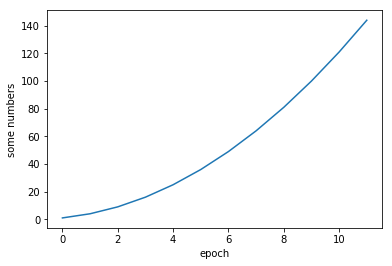

In [21]:
import matplotlib.pyplot as plt

#a=[2,4,6,3]
a=[1,4,9,16, 25,36,49,64,81,100,121,144]

#plt.plot([1,4,9,16, 25,36,49,64,81,100,121,144])
plt.plot(a)
plt.ylabel('some numbers')
plt.xlabel('epoch')


plt.show()

tensor(1.5776, grad_fn=<MeanBackward0>) tensor(0.9444, grad_fn=<MeanBackward0>) tensor(2.5221, grad_fn=<AddBackward0>)


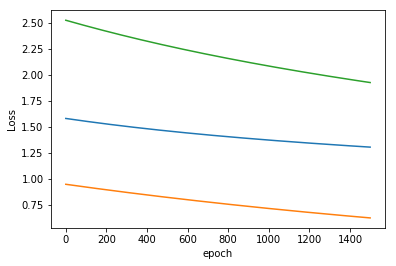

In [33]:
import matplotlib.pyplot as plt
import numpy as np

l1=np.array(loss1_values)
l2=np.array(loss2_values)
l3=l1+l2

print(l1[1],l2[1],l3[1])

plt.ylabel('Loss')
plt.xlabel('epoch')
plt.plot(l1)
plt.plot(l2)
plt.plot(l3)

Here we plot the mean of two loss components separately along with their sum !!